# Problem Statement

Employee turn-over (also known as "employee churn") is a costly problem for companies. The true cost of replacing an employee can often be quite large. A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced. In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

In this study, given that we have data on former employees, this is a supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

This project would fall under what is commonly known as **"HR Analytics", "People Analytics"**.

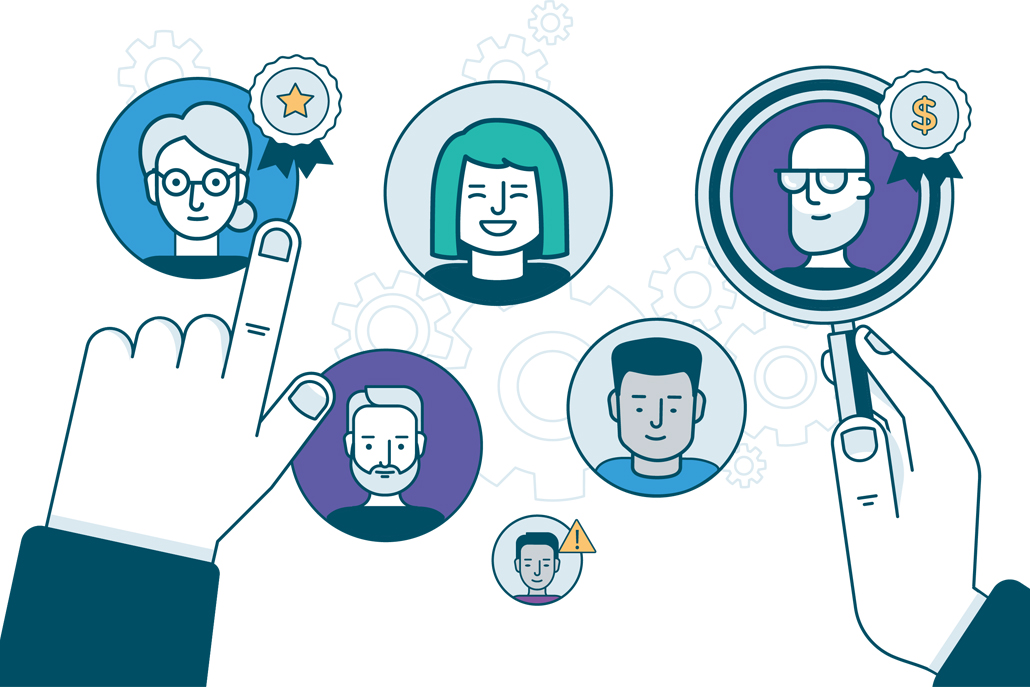

## Importing Python Libraries

In [352]:
import warnings
warnings.filterwarnings('ignore')

In [353]:
# importing data wrangling libraries
import pandas as pd
import numpy as np

In [354]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

## Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br>  The dataset contains 1,470 rows and 35 columns.

In [355]:
import os
print(os.listdir("../input"))

['ibm-hr-analytics-attrition-dataset']


In [356]:
# Read Excel file
df_sourcefile = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


In [357]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

## EDA Analysis

In [358]:
# Changing the default pandas settings to see the full table
pd.set_option('display.max_rows', 1000);
pd.set_option('display.max_columns', 1000); 

In [359]:
# Describing the numerical variables in a tabular format
df_HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [360]:
# Describing the categorical variables in a tabular format
df_HR.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [361]:
# Showing dataset first 5 rows
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [362]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [363]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [364]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [365]:
df_HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> As we can see there is no missing value inside the df.

In [ ]:
# Plotting the numerical variables in histograms to see their distribution.
df_HR.hist(figsize=(20,20))
plt.show()

In [ ]:
# Plotting the categorical variables to see their distribution
fig=plt.figure(figsize=(20,50))
plt.style.use('seaborn-colorblind')
for i in range(len((df_HR.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    df_HR.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%',
        shadow=True, startangle=180)

In [ ]:
# Dropping variables that just have one value.
df_HR.drop([ 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1,inplace=True)

## Employee Attrition by Age

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');
print('Ex-exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='Yes']['Age'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='No']['Age'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

> As we can see the Employee's leaving tend to be younger.

## Employee Attrition by Distance

In [ ]:
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

print('Median distance from home for currently active employees: {:.0f} miles and ex-employees: {:.0f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].median(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].median()))

print('Standard Deviation distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].std(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].std()))


plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Distance From Home Distribution in Percent by Attrition Status');

> As we can see the Employee's leaving tend to be farther from home.

## Employee Attrition by Years at Company

In [ ]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

print('Ex-exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format(
    df_HR[df_HR['Attrition']=='Yes']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format
      (df_HR[df_HR['Attrition']=='No']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Years At Company in Percent by Attrition Status');

> As we can see the Employee's leaving tend to have more seniority at the Company.

## Target Variable EDA

In [ ]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

In [ ]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

In [ ]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution', color='darkblue')

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms with a stratified approach.

# Correlation Analysis

Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [ ]:
# Find correlations with the target and sort
df_HR_corr = df_HR.copy()
df_HR_corr['Target'] = df_HR_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_HR_corr = df_HR_corr.drop(['Attrition'], axis=1)
correlations = df_HR_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

In [ ]:
# Calculate correlations
corr = df_HR_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

# Outlier Analysis & Filtering

### Winsorization
To winsorize data means to set extreme outliers equal to a specified percentile of the data, in this case we are going to be conservative and we are going to stay with the 98% of every variable, filtering the top 1% and bottom 1%.

In [ ]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out=[]
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    print("Outliers:",out)
    return out;
def remove_outliers(df):
    print("Registers in the initial dataset:",df.shape[0])
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            print(col)
            data_filter = Winsorization_outliers(df[col])
            df = df[~df[col].isin(data_filter)]
            print("Registers without outliers in "+col+" :"+ str(df.shape[0]))
    return df;


df_HR_Cleaned = remove_outliers(df_HR)
        

# Feature Engineering

In [ ]:
df_HR_Cleaned['Attrition'] = df_HR_Cleaned['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
df_HR_Cleaned.head(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR_Cleaned.columns[1:]:
    if df_HR_Cleaned[col].dtype == 'object':
        if len(list(df_HR_Cleaned[col].unique())) <= 2:
            le.fit(df_HR_Cleaned[col])
            df_HR_Cleaned[col] = le.transform(df_HR_Cleaned[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

# convert rest of categorical variable into dummy
df_HR_Cleaned = pd.get_dummies(df_HR_Cleaned, drop_first=True)

In [ ]:
print(df_HR_Cleaned.shape)
df_HR_Cleaned.head()

In [ ]:
df_HR_Cleaned.info()

# Outlier Filtering using Mahalanobis Distance

In [ ]:
# Reducing in 2 components your data with Principal Component Analysis to filter outliers through Mahalanobis Distance.
from sklearn.decomposition import PCA

training_data = df_HR_Cleaned.copy()
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(training_data)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = training_data.index
X_train_PCA.head()

#PCA Explained Variance Ratio & Components
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

In [ ]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)
    return np.array(outliers)
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
data_train = np.array(X_train_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
print("Mahalanobis Distance Threshold is {:.2f}".format(threshold))

In [ ]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

In [ ]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [ ]:
threshold = 3.4

In [ ]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

In [ ]:
anomaly_train['Anomaly'].value_counts()


In [ ]:
training_data = training_data[~anomaly_train['Anomaly']]


In [ ]:
for col in training_data.columns:
    if (training_data[col].dtype != 'object') & (len(training_data[col].unique()) > 10):
        training_data[col].plot(kind='box')
        plt.show()

In [ ]:
training_data.shape
training_data.info()

# Remove collinear features¶

In [ ]:
# Threshold for removing correlated variables
threshold = 0.85

# Absolute value correlation matrix
corr_matrix = training_data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

training_data = training_data.drop(columns = to_drop)

to_drop

In [ ]:
skewed_columns=[]
for i in training_data.loc[:, training_data.ge(1).all()].columns:
    if (abs(training_data[i].skew())> 0.5)  & (len(training_data[i].unique()) >10):
        skewed_columns.append(i)
print(skewed_columns)


In [ ]:
training_data.head()

In [ ]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import boxcox 


scaler = RobustScaler()
HR_col = list(training_data.columns)
HR_col.remove('Attrition')
for col in HR_col:
    if col in skewed_columns:
        training_data[col], best_lambda = boxcox(training_data[col]) 
    training_data[col] = training_data[col].astype(float)
    training_data[[col]] = scaler.fit_transform(training_data[[col]])
training_data.head()

In [ ]:
print('Size of Full dataset is: {}'.format(training_data.shape))

In [ ]:
from sklearn.model_selection import train_test_split  # import 'train_test_split'

target_variable_name = 'Attrition'
target = training_data[target_variable_name].copy()

df_HR = training_data.drop(target_variable_name, axis=1)

In [ ]:
from sklearn.feature_selection import RFECV

#estimator_LR = LogisticRegression(random_state=0)
estimator_LR = LogisticRegression(C=1.6, penalty='l2', random_state=42, max_iter=100)
selector_LR = RFECV(estimator_LR, step=1, cv=5,scoring='roc_auc', n_jobs = -1)
selector_LR = selector_LR.fit(df_HR, target)
print('Optimal number of features :', selector_LR.n_features_)
print('Best features :', df_HR.columns[selector_LR.support_])

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
plt.show()

In [ ]:

df_HR = df_HR[df_HR.columns[selector_LR.support_]]
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
from mlxtend.classifier import StackingCVClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = xgb.XGBClassifier(eval_metric='auc', objective='binary:logistic', alpha=1)
eclf = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2),('xgb', clf3)],voting='soft')

eclf_params = {

    'lr__C': np.linspace(1, 3, 10),
    'lr__penalty':['l1', 'l2'],
    
    'rf__n_estimators' : list(range(50, 101, 10)),
    'rf__max_features': ['auto', 'log2'],
    
    'xgb__subsample': [0.8, 0.9],
    'xgb__colsample_bytree': np.linspace(0.6, 1, 5),
    'xgb__eta': np.linspace(0.001, 0.5, 20),
    'xgb__n_estimators': [100, 250, 500],
    'xgb__max_depth': [4, 5, 6],
    'xgb__min_child_weight': [2, 3, 4],
}
voting_clf = RandomizedSearchCV(eclf, eclf_params, random_state=0, scoring='roc_auc', cv=skfold, n_iter=25)

In [ ]:
%%time
voting_search = voting_clf.fit(X_train, y_train)

In [ ]:
voting_search.best_score_


In [ ]:
voting_search.best_params_


In [ ]:
best_model = voting_search.best_estimator_


In [ ]:
# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, best_model.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');



In [ ]:
tp = cnf_matrix[1,1]
fn = cnf_matrix[1,0]
fp = cnf_matrix[0,1]
tn = cnf_matrix[0,0]
Accuracy  =  round(((tp+tn)/(tp+tn+fp+fn))*100,2)
Precision =  round((tp/(tp+fp))*100,2)
Recall    =  round((tp/(tp+fn))*100,2)
F1_score  =  round((2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))*100,2)




In [ ]:
show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]],columns=['Accuracy', 'Precision', 'Recall','F1_score'], index=['Valores'])
show_metrics.head(5)

In [ ]:
probs = best_model.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Best Model ROC
plt.plot(fpr, tpr, label='Best Model (area = %0.2f)' % logit_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()